In [28]:
# importing the depedencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Load the dataset
dataset = pd.read_csv('banana_quality.csv')
dataset.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [3]:
# Display the columns 
columns = dataset.columns
print(columns)

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')


## Exploratory Data Analysis

In [4]:
# display the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


### As we can see the dataset does not have any null values

In [5]:
# display the descriptive statistics about the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,8000.0,-0.747802,2.136023,-7.998074,-2.277651,-0.897514,0.654216,7.970800
Weight,8000.0,-0.761019,2.015934,-8.283002,-2.223574,-0.868659,0.775491,5.679692
Sweetness,8000.0,-0.770224,1.948455,-6.434022,-2.107329,-1.020673,0.311048,7.539374
Softness,8000.0,-0.014441,2.065216,-6.959320,-1.590458,0.202644,1.547120,8.241555
HarvestTime,8000.0,-0.751288,1.996661,-7.570008,-2.120659,-0.934192,0.507326,6.293280
Ripeness,8000.0,0.781098,2.114289,-7.423155,-0.574226,0.964952,2.261650,7.249034
Acidity,8000.0,0.008725,2.293467,-8.226977,-1.629450,0.098735,1.682063,7.411633


In [6]:
# count the number of good and bad quality bananas
dataset.Quality.value_counts()

Quality
Good    4006
Bad     3994
Name: count, dtype: int64

C:\Users\ronit\AppData\Local\Temp\ipykernel_9880\774774906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quality', data=dataset, palette='flare')


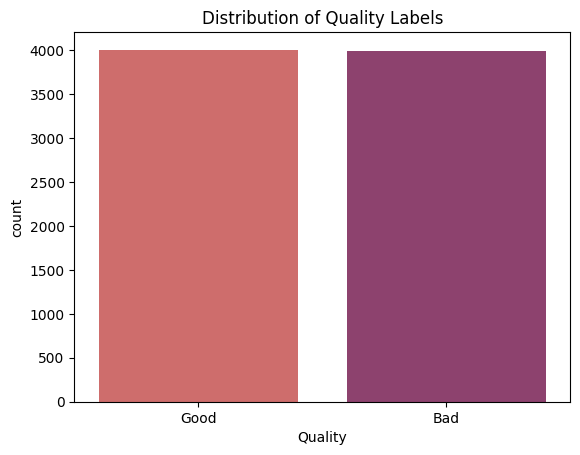

In [7]:
# plotting the count of good and bad quality bananas
sns.countplot(x='Quality', data=dataset, palette='flare')
plt.title('Distribution of Quality Labels')
plt.show()

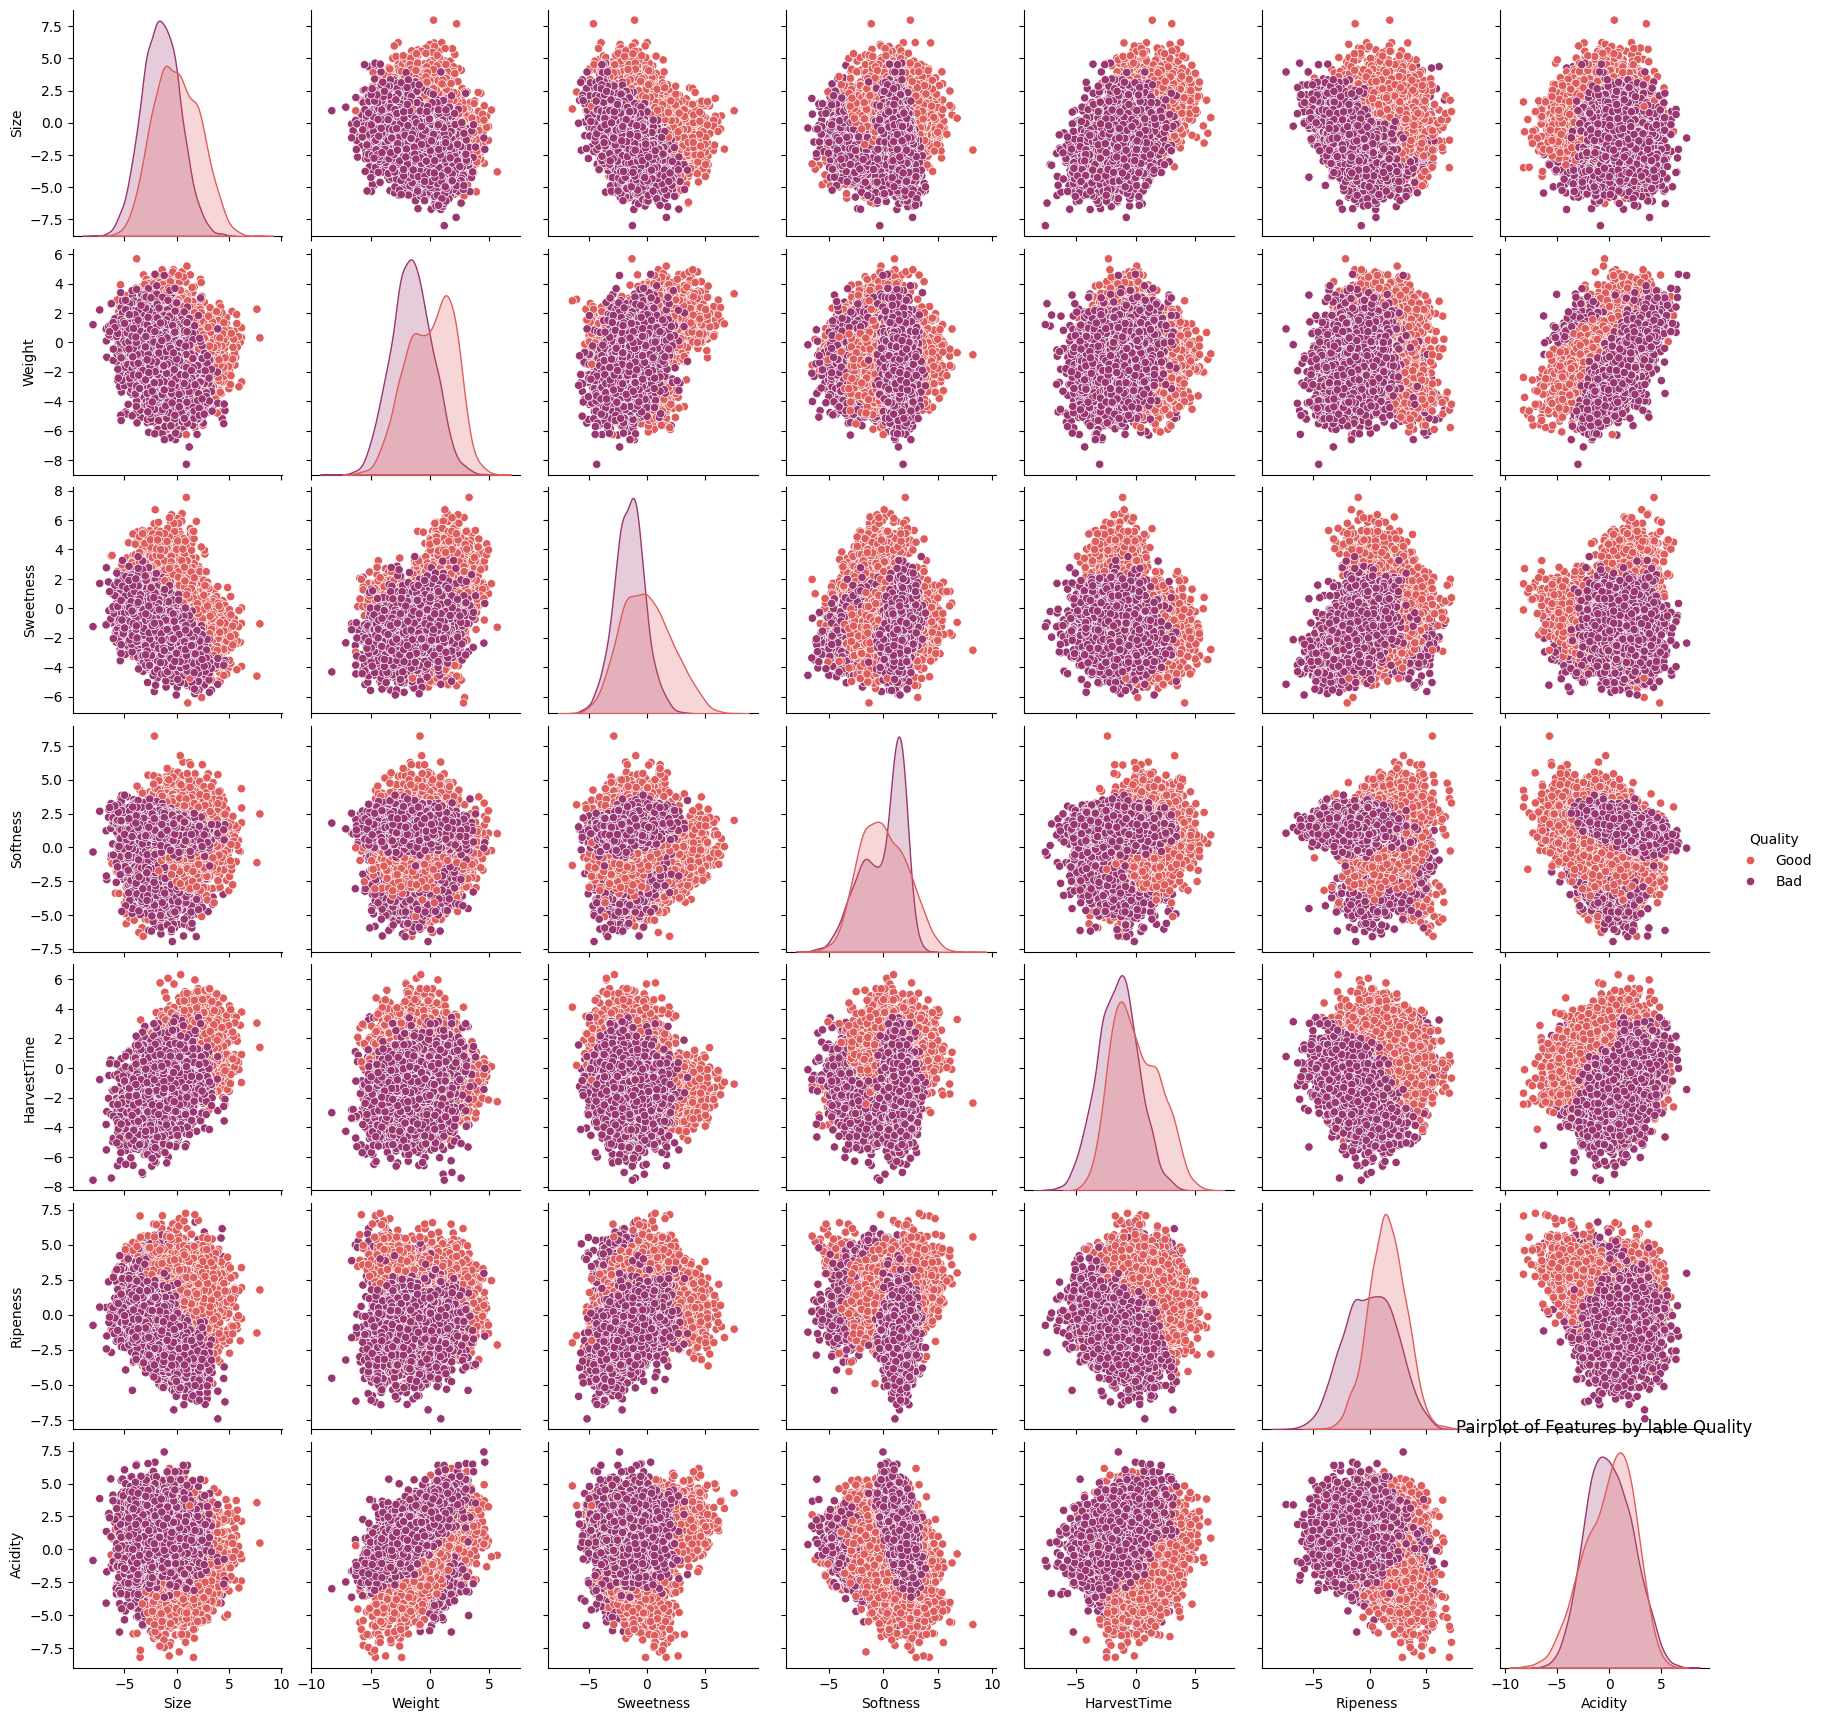

In [10]:
# display the pairplot to get more information about the data based on quality
sns.pairplot(dataset, hue='Quality', palette='flare')
plt.title('Pairplot of Features by lable Quality')
plt.show()

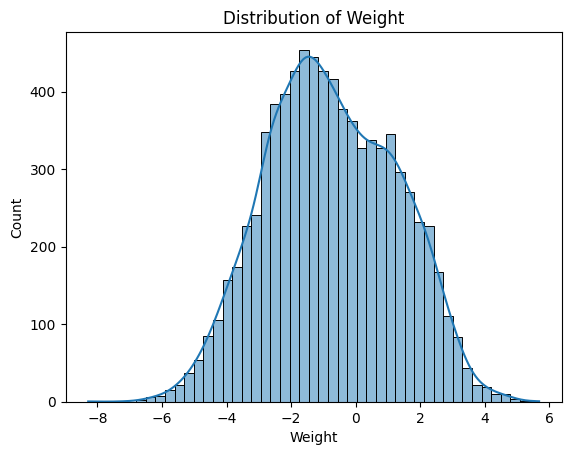

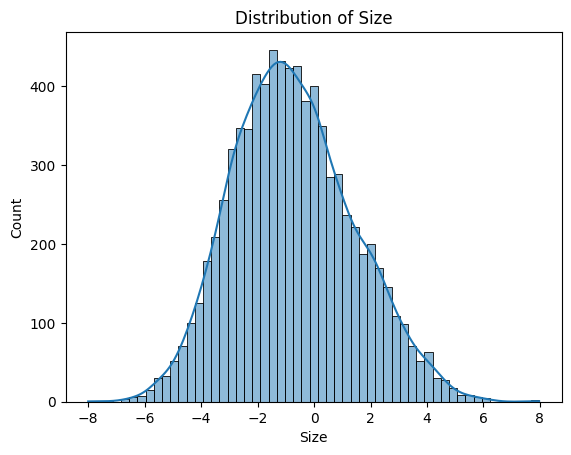

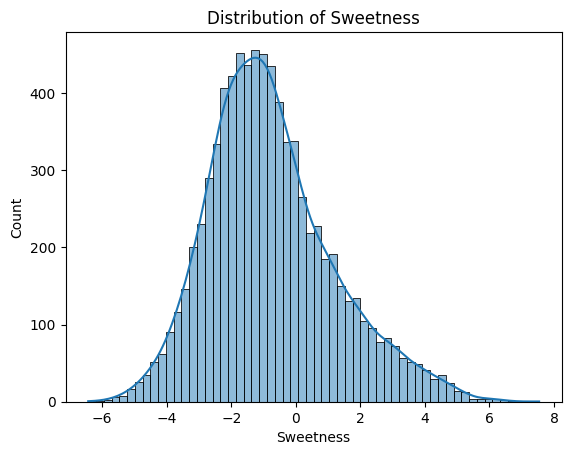

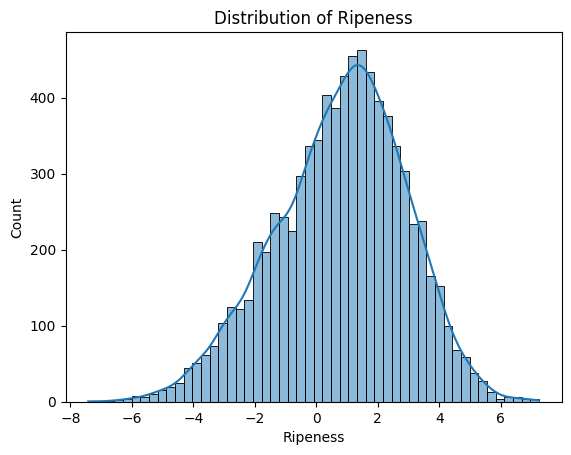

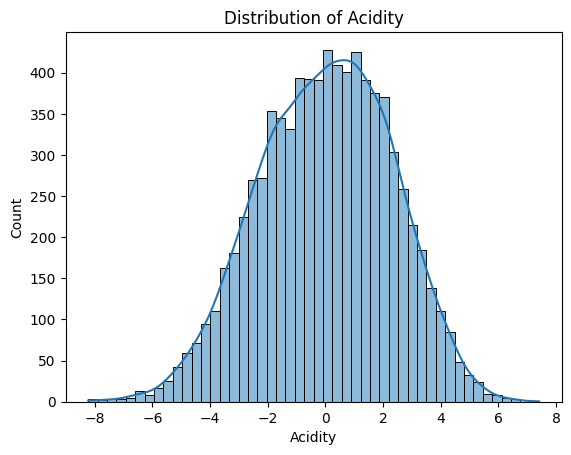

In [11]:
# Plotting distribution of features to get some insights
for feature in ['Weight', 'Size', 'Sweetness','Ripeness','Acidity']:
    sns.histplot(dataset[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### As we can see, every distribution follows a normal distribution

## Feature Selection

In [15]:
# Splitting the data into features and labels
X = dataset.drop('Quality', axis=1)
y = dataset['Quality']

In [16]:
# Initialize the encoder
le = LabelEncoder()

# Fit and transform the labels
numeric_labels = le.fit_transform(y)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Creation

In [18]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

In [19]:
# making predictions
y_pred = clf.predict(X_test)

In [21]:
acc = accuracy_score(y_test, y_pred)
print("Model accuracy = ", acc)

Model accuracy =  0.88


In [22]:
# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         Bad       0.88      0.87      0.88       781
        Good       0.88      0.89      0.88       819

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



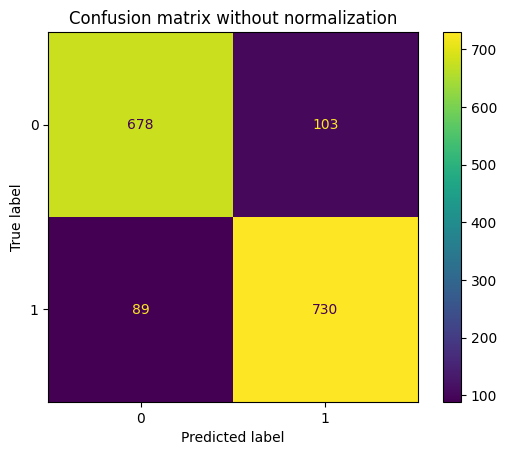

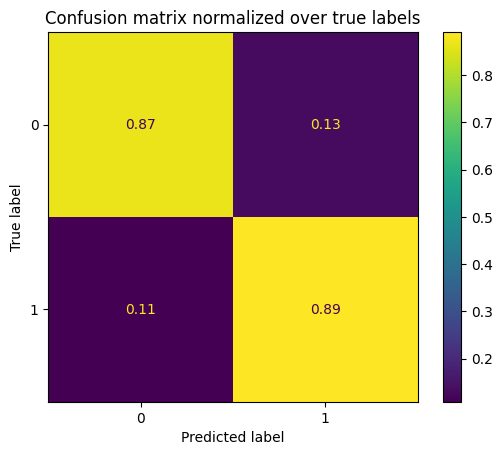

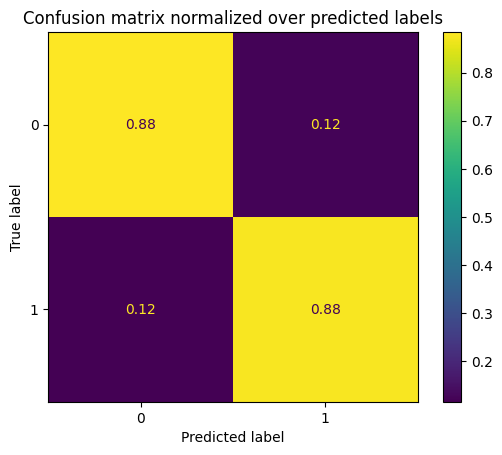

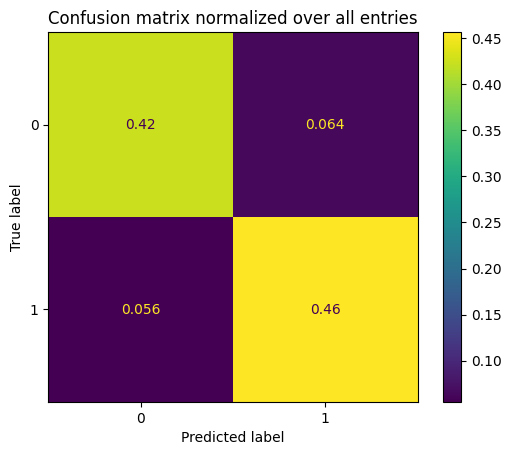

In [29]:
# Confusion matrix without normalization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion matrix without normalization")
plt.show()

# Confusion matrix normalized over true labels
cm_true = confusion_matrix(y_test, y_pred, normalize='true')
disp_true = ConfusionMatrixDisplay(confusion_matrix=cm_true)
disp_true.plot()
plt.title("Confusion matrix normalized over true labels")
plt.show()

# Confusion matrix normalized over predicted labels
cm_pred = confusion_matrix(y_test, y_pred, normalize='pred')
disp_pred = ConfusionMatrixDisplay(confusion_matrix=cm_pred)
disp_pred.plot()
plt.title("Confusion matrix normalized over predicted labels")
plt.show()

# Confusion matrix normalized over all entries
cm_all = confusion_matrix(y_test, y_pred, normalize='all')
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all)
disp_all.plot()
plt.title("Confusion matrix normalized over all entries")
plt.show()
